# bionet PCA dimension reduction
http://yltang.net/tutorial/dsml/14/
https://kknews.cc/zh-tw/code/zpl6l3q.html
https://zhuanlan.zhihu.com/p/43225794
https://kknews.cc/zh-tw/other/3489pvo.html

In [150]:
# 載入需要的套件
%matplotlib qt
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
from mpl_toolkits.mplot3d import Axes3D
import imageio
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

plt.style.use('ggplot')
np.set_printoptions(precision=5, suppress=True)
# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = os.path.join('/Volumes','Transcend','下載項目','實習','工研院','paper/')

In [151]:
# 讀取檔案
f_app = os.path.join(dir_data, '仁德水樣數據 整理_202000716.xlsx')
print('Path of read in data: %s' % (f_app))
df = pd.read_excel(f_app)
df.head()

Path of read in data: /Volumes/Transcend/下載項目/實習/工研院/paper/仁德水樣數據 整理_202000716.xlsx


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Influent,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,NaN,Fake Date,NaT,日期,樣品,pH,導電度(us/cm),濁度(NTU),SS(mg/L),COD(mg/L),...,NH3-N,NO2-N,NO3-N,TKN,NaN,氨氮去除率,COD去除率,濁度去除率,TOC去除率,SS去除率
1,NaN,1,2018-11-22,2018-11-22 00:00:00,砂濾出,7.05,748,2.88,0,28,...,7.64318,14.5622,23.6149,NaN,NaN,22.673,7.14286,20.1389,-9.07591,0
2,NaN,2,2018-11-23,2018-11-23 00:00:00,砂濾出,7.08,766,2.23,18,23,...,14.9325,12.9553,26.0611,NaN,NaN,-0.796178,-13.0435,-42.1525,-9.9734,100
3,NaN,3,2018-11-30,2018-11-30 00:00:00,前砂濾出水,6.73,755,2.5,24,41,...,0.526139,6.52701,41.8618,NaN,NaN,93.7669,36.5854,43.2,12.7778,91.6667
4,NaN,4,2018-12-03,2018-12-04 00:00:00,前砂濾出水,6.59,780,2.48,2,23,...,2.64213,11.4664,31.2484,NaN,NaN,72.1351,-69.5652,-12.0968,-20.9459,100


In [152]:
influent = df.iloc[0:64,5:15]
new_header = influent.iloc[0] 
influent = df.iloc[1:64,5:15] 
influent.columns = new_header

influent.drop(columns=['TKN'],inplace=True)
influent.dropna(axis='rows',inplace=True)
influent

,pH,導電度(us/cm),濁度(NTU),SS(mg/L),COD(mg/L),TOC(mg/L),NH3-N,NO2-N,NO3-N
1,7.05,748,2.88,0,28,6.06,9.88423,13.6583,25.2143
2,7.08,766,2.23,18,23,7.52,14.8146,12.0515,24.6498
3,6.73,755,2.5,24,41,9,8.44111,9.70232,28.2461
4,6.59,780,2.48,2,23,4.44,9.48195,8.73209,23.8063
5,6.48,764,2.96,1,39,6.38,5.50159,11.9956,26.0896
6,6.4,763,2.56,4,34,6.53,6.94275,9.52591,28.6267
7,6.43,756,2.76,14,36,6.06,8.52117,7.76186,28.4153
8,6.38,763,2.68,8,39,6.71,8.29241,8.07057,27.4004
9,6.46,772,2.71,0,31,6.98,17.2253,6.43881,28.0347
10,6.63,756,2.59,0,19,8.32,10.3283,7.5193,28.9438


In [153]:
effluent = df.iloc[1:64,16:26] 
effluent.columns = new_header

effluent.drop(columns=['TKN'],inplace=True)
effluent.dropna(axis='rows',inplace=True)
effluent

,pH,導電度(us/cm),濁度(NTU),SS(mg/L),COD(mg/L),TOC(mg/L),NH3-N,NO2-N,NO3-N
1,6.88,719,2.3,0,26,6.61,7.64318,14.5622,23.6149
2,7.2,765,3.17,0,26,8.27,14.9325,12.9553,26.0611
3,6.59,705,1.42,2,26,7.85,0.526139,6.52701,41.8618
4,6.28,739,2.78,0,39,5.37,2.64213,11.4664,31.2484
5,6.24,732,2.78,0,35,4.63,0.05,12.3925,29.8107
6,6.38,753,2.5,8,27,7.3,5.75322,9.57001,29.4301
7,6.07,715,2.87,6,33,6.92,0.354572,10.2315,35.35
8,6.17,733,2.9,16,34,5.92,5.54734,8.73209,31.2484
9,6.17,716,1.92,0,22,6.7,0.05,5.68909,40.7201
10,6.53,723,1.01,0,21,6.36,0.05,2.62404,43.2995


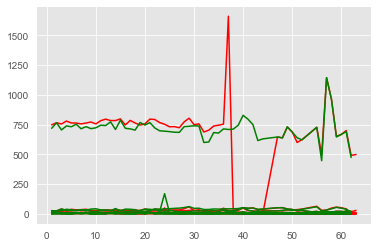

In [154]:
plt.plot(influent,'r')
plt.plot(effluent,'g')



In [155]:
# 取出幾項變數並檢驗其相關性
influent_corrs = influent.astype(float).corr()
influent_corrs

,pH,導電度(us/cm),濁度(NTU),SS(mg/L),COD(mg/L),TOC(mg/L),NH3-N,NO2-N,NO3-N
0,,,,,,,,,
pH,1.000000,-0.286553,-0.249572,-0.001732,-0.065945,0.077889,-0.238703,-0.412594,0.089341
導電度(us/cm),-0.286553,1.000000,0.304305,0.085874,0.085886,-0.104054,0.288020,0.326555,-0.345013
濁度(NTU),-0.249572,0.304305,1.000000,-0.076853,0.086894,-0.402932,0.662008,0.627629,-0.294591
SS(mg/L),-0.001732,0.085874,-0.076853,1.000000,-0.088278,-0.030467,0.058482,-0.000796,0.124565
COD(mg/L),-0.065945,0.085886,0.086894,-0.088278,1.000000,0.670457,-0.158512,-0.059761,-0.313017
TOC(mg/L),0.077889,-0.104054,-0.402932,-0.030467,0.670457,1.000000,-0.489415,-0.484847,-0.122224
NH3-N,-0.238703,0.288020,0.662008,0.058482,-0.158512,-0.489415,1.000000,0.568089,-0.235358
NO2-N,-0.412594,0.326555,0.627629,-0.000796,-0.059761,-0.484847,0.568089,1.000000,-0.194216
NO3-N,0.089341,-0.345013,-0.294591,0.124565,-0.313017,-0.122224,-0.235358,-0.194216,1.000000


In [156]:
effluent_corrs = effluent.astype(float).corr()
effluent_corrs

,pH,導電度(us/cm),濁度(NTU),SS(mg/L),COD(mg/L),TOC(mg/L),NH3-N,NO2-N,NO3-N
0,,,,,,,,,
pH,1.000000,-0.217747,-0.228309,-0.104909,0.304531,0.480772,-0.063508,-0.508000,-0.320578
導電度(us/cm),-0.217747,1.000000,0.215385,-0.061726,0.291947,0.191711,0.229942,0.120329,-0.043610
濁度(NTU),-0.228309,0.215385,1.000000,0.124755,0.152010,-0.113347,0.285253,0.259924,-0.205774
SS(mg/L),-0.104909,-0.061726,0.124755,1.000000,-0.116104,-0.010903,-0.077765,-0.053899,0.100449
COD(mg/L),0.304531,0.291947,0.152010,-0.116104,1.000000,0.722665,0.113666,-0.039807,-0.504523
TOC(mg/L),0.480772,0.191711,-0.113347,-0.010903,0.722665,1.000000,-0.185276,-0.480945,-0.331251
NH3-N,-0.063508,0.229942,0.285253,-0.077765,0.113666,-0.185276,1.000000,0.553365,-0.406996
NO2-N,-0.508000,0.120329,0.259924,-0.053899,-0.039807,-0.480945,0.553365,1.000000,-0.243285
NO3-N,-0.320578,-0.043610,-0.205774,0.100449,-0.504523,-0.331251,-0.406996,-0.243285,1.000000


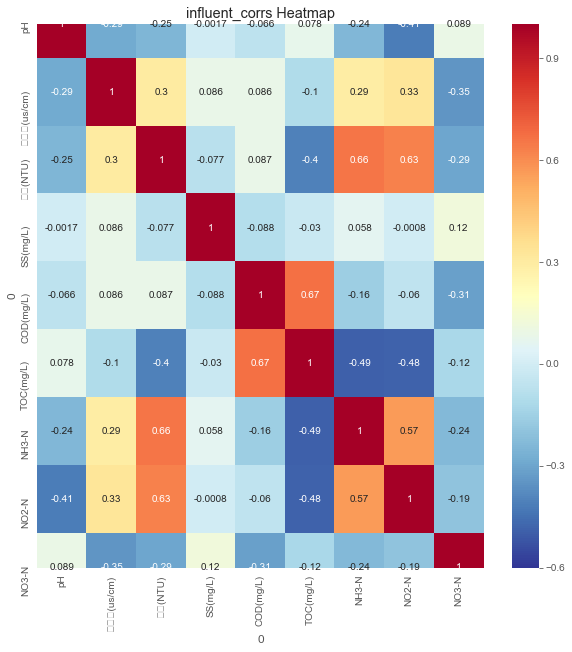

In [157]:
plt.figure(figsize = (10, 10))
# 繪製相關係數 (correlations) 的 Heatmap
sns.heatmap(influent_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.6, annot = True, vmax = 1.0)
plt.title('influent_corrs Heatmap');

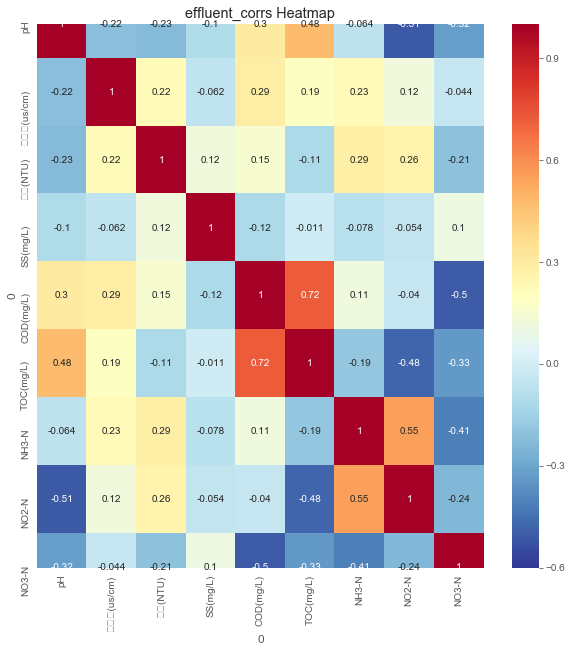

In [158]:
plt.figure(figsize = (10, 10))
# 繪製相關係數 (correlations) 的 Heatmap
sns.heatmap(effluent_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.6, annot = True, vmax = 1.0)
plt.title('effluent_corrs Heatmap');

In [159]:
#influent_drop=influent.drop(columns=['NH3-N','濁度(NTU)'])
#effluent_drop=effluent.drop(columns=['pH','COD(mg/L)','NO2-N'])

In [160]:
#from sklearn.decomposition import PCA
pca=PCA(n_components=3)
influent_trans = pca.fit_transform(influent)
influent_trans

array([[  81.77522,   -1.14666,   -8.17217],
       [  99.83157,   -8.24709,   -7.92066],
       [  88.80237,    0.65412,    9.42889],
       [ 113.75852,   -4.52117,  -10.69792],
       [  97.7617 ,    5.49175,    1.2281 ],
       [  96.72073,   -0.25077,    0.41258],
       [  89.75794,   -1.09323,    3.50871],
       [  96.76267,    3.02041,    3.41994],
       [ 105.75956,   -1.32885,   -5.95706],
       [  89.67471,   -9.29264,   -9.87481],
       [ 116.71965,   -3.06389,   -3.73774],
       [ 129.77323,    1.9013 ,   -4.73768],
       [ 117.79303,   -1.14172,   -1.58124],
       [ 117.79707,    2.74647,   -3.00558],
       [ 131.82113,    0.98129,   -9.35696],
       [  80.84477,    3.6616 ,   -9.44871],
       [ 118.87624,   -3.48104,   -8.55086],
       [  97.83234,    4.60815,   -7.97218],
       [  79.81931,    2.08658,   -9.88859],
       [  89.89973,   10.53354,   -5.96996],
       [ 129.80868,    2.03528,   -4.93784],
       [ 126.77754,    4.77679,   -1.01414],
       [ 1

In [161]:
#第一個是explained_variance_，它代表降維後的各主成分的方差值。方差值越大，則說明越是重要的主成分。
#第二個是explained_variance_ratio_，它代表降維後的各主成分的方差值佔總方差值的比例，這個比例越大，則越是重要的主成分。
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[83540.34677   132.81642    79.37372]
[0.99613 0.00158 0.00095]


In [162]:
#X=pca.inverse_transform(influent_fit)
#X

In [163]:
influent_trans_df=pd.DataFrame(influent_trans, columns=['PCA%i' % i for i in range(3)], index=influent.index)

Text(0.5, 0.92, 'PCA components=3 on the influent data set')

<Figure size 1000x1000 with 0 Axes>

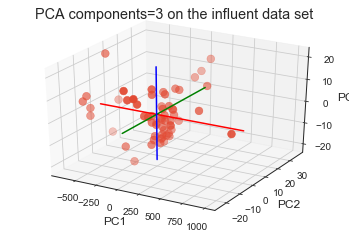

In [164]:
#df['species']=pd.Categorical(df['species']) 
##Keep the 'specie' column appart + make it numeric for coloring
#influent['pH']=pd.Categorical(influent['pH'])
#my_color=influent['pH'].cat.codes
sns.set_style("white")
plt.figure(figsize=(10, 10), dpi=100)

# 20 plots, for 20 different angles
##for angle in range(70,210,2): 
    # Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(influent_trans_df['PCA0'], influent_trans_df['PCA1'], influent_trans_df['PCA2'], c=None, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(influent_trans_df['PCA0']), max(influent_trans_df['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(influent_trans_df['PCA1']), max(influent_trans_df['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'g')
zAxisLine = ((0, 0), (0,0), (min(influent_trans_df['PCA2']), max(influent_trans_df['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')

##ax.view_init(30,angle)
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA components=3 on the influent data set")
#filename= dir_data+'/PCA/'+'influent_PCA_com3_angle'+'testrotation'+'.png' 
#plt.savefig(filename, dpi=100)
#plt.show()


In [65]:
effluent_trans = pca.fit_transform(effluent)
effluent_trans

array([[   5.62814,   -9.74365,    8.10012],
       [  51.6642 ,   -8.81971,    6.06568],
       [  -8.60151,   -6.44566,   -7.34369],
       [  25.88269,   -9.43181,    7.32544],
       [  18.74902,   -9.40491,    6.22775],
       [  39.43753,   -0.70545,    3.57726],
       [   1.58607,   -3.19997,    1.85679],
       [  19.50555,    6.64842,    6.6557 ],
       [   2.29373,   -8.06874,   -9.17993],
       [   9.22421,   -7.66381,  -12.16758],
       [  31.48232,   -8.38195,   -1.27755],
       [  28.60107,   -8.71612,    1.34438],
       [  59.54882,    1.19192,    7.94292],
       [  -5.06452,    9.17509,  -12.14558],
       [  73.71167,   -8.52788,    6.94241],
       [   5.16764,   -3.95797,   -9.39641],
       [   0.29662,   -8.25859,   -7.89062],
       [  -9.63894,   -8.75038,   -4.08904],
       [  54.52096,    2.75005,   11.68058],
       [  33.02709,  -10.20151,   15.99824],
       [  53.85087,    0.64769,   12.04158],
       [   8.54818,   -4.4466 ,   -4.52035],
       [ -

In [66]:
effluent_trans_df=pd.DataFrame(effluent_trans, columns=['PCA%i' % i for i in range(3)], index=effluent.index)

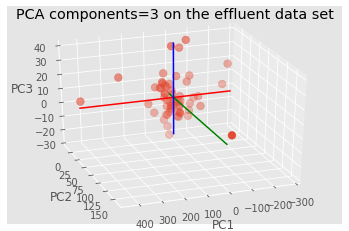

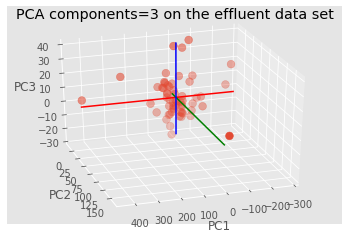

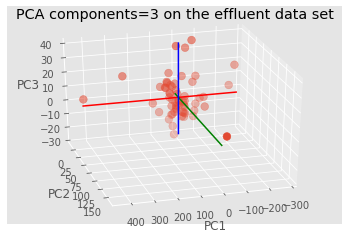

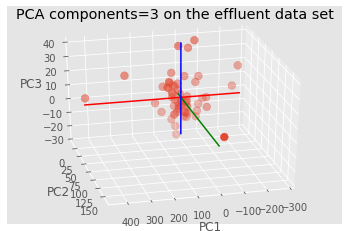

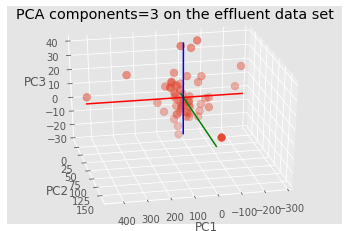

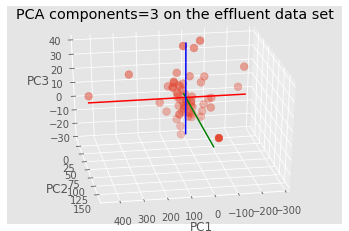

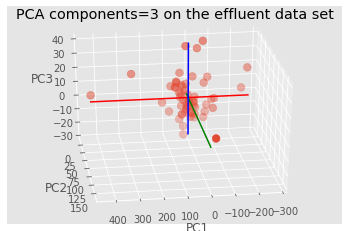

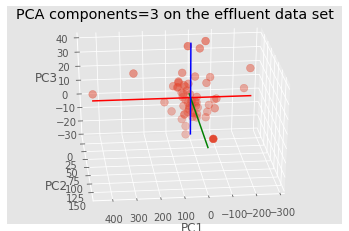

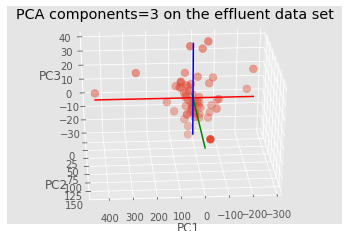

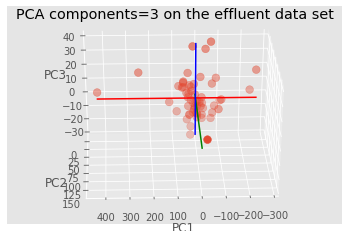

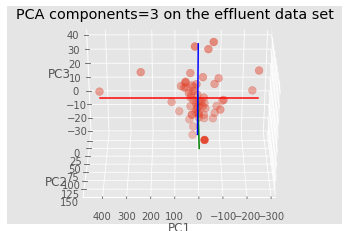

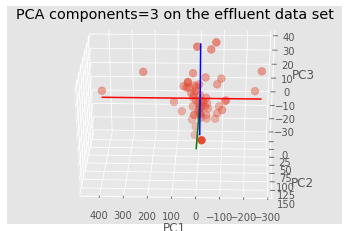

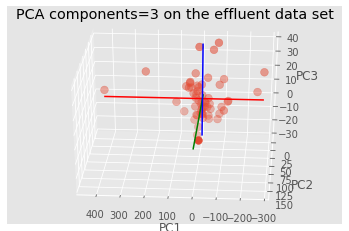

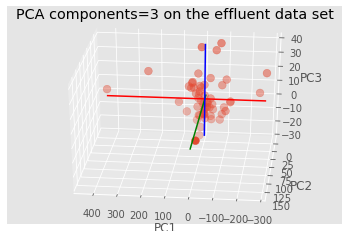

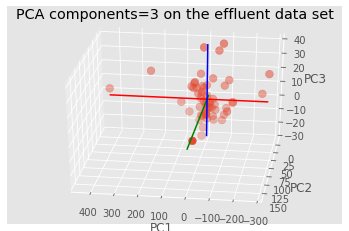

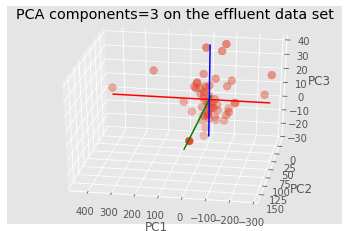

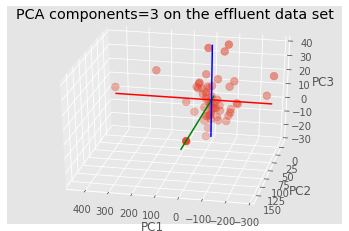

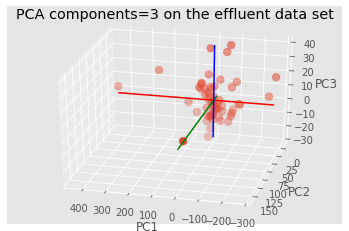

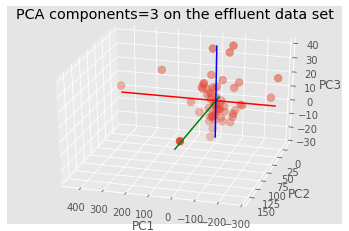

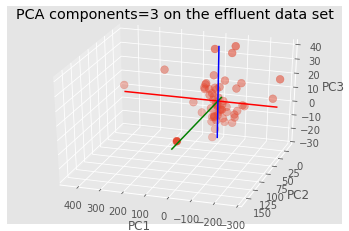

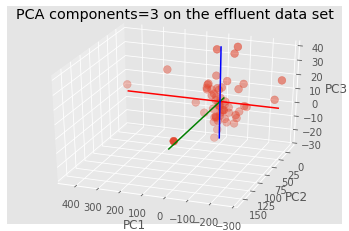

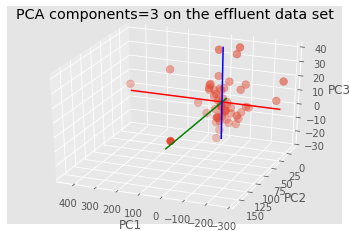

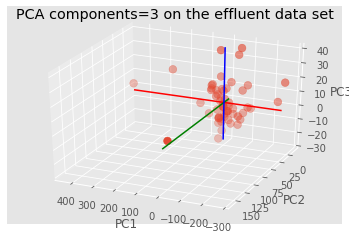

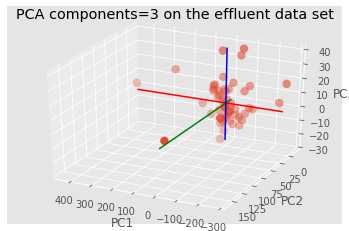

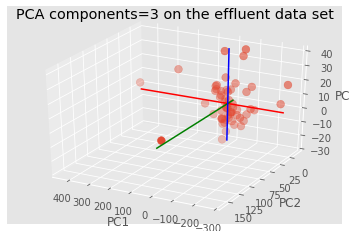

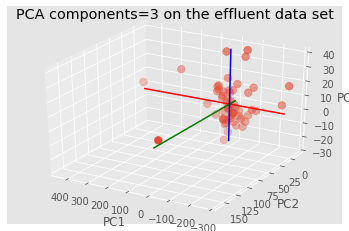

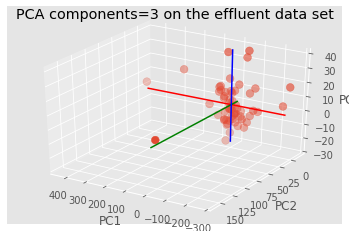

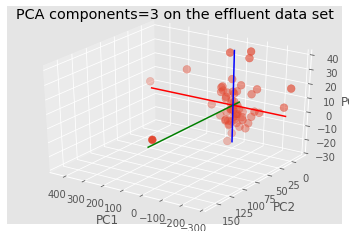

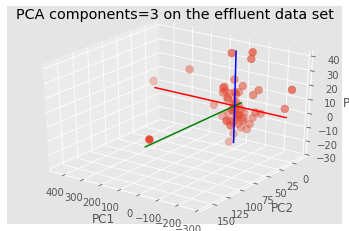

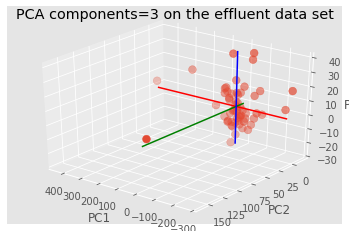

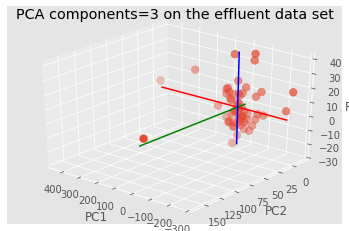

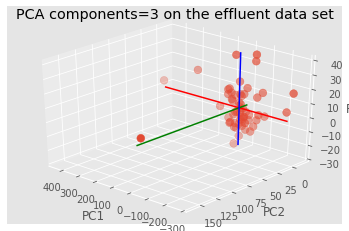

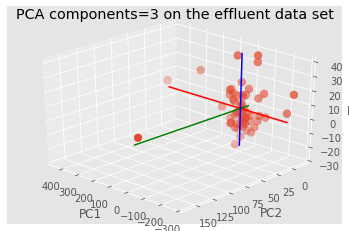

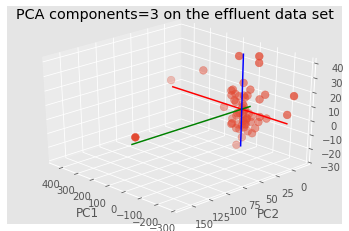

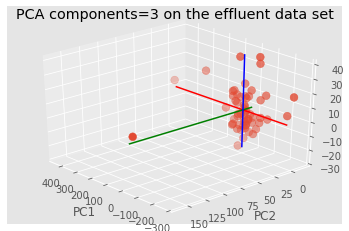

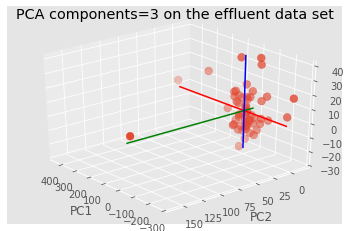

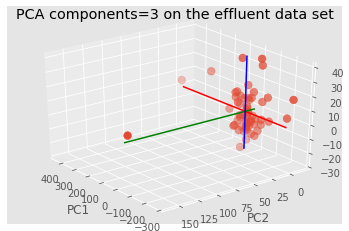

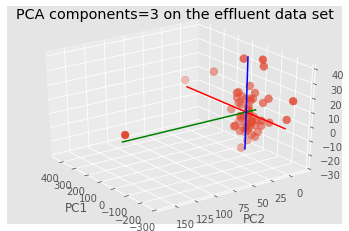

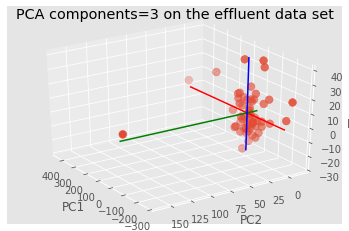

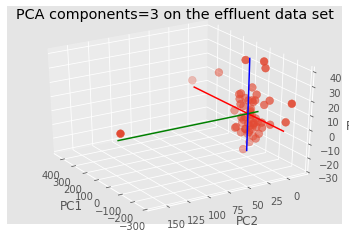

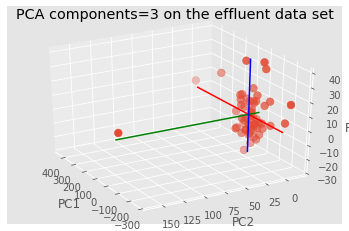

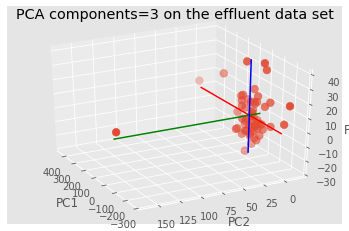

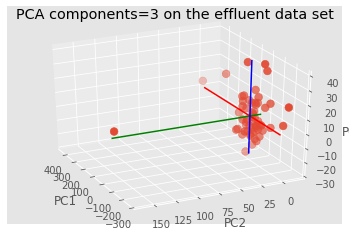

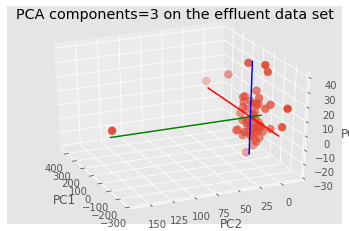

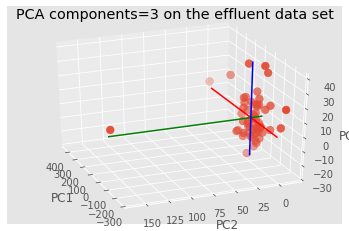

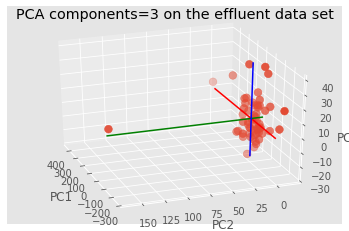

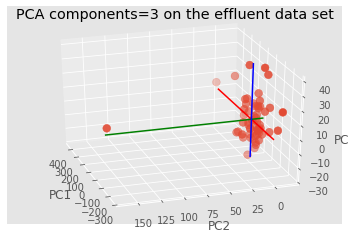

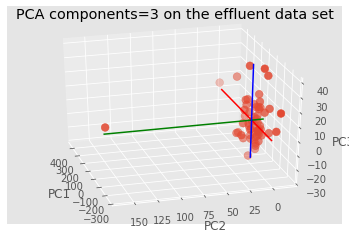

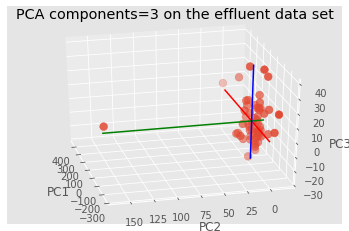

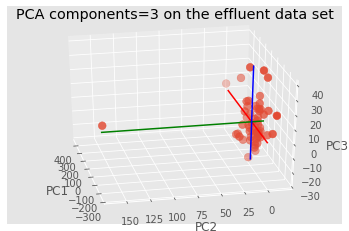

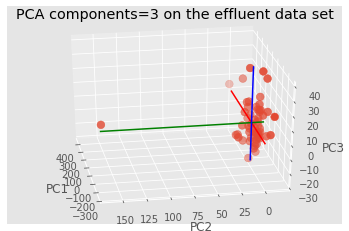

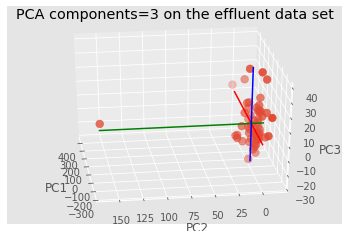

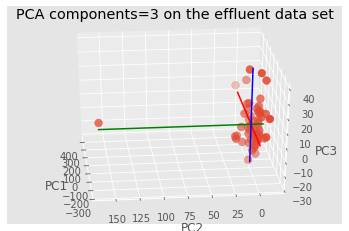

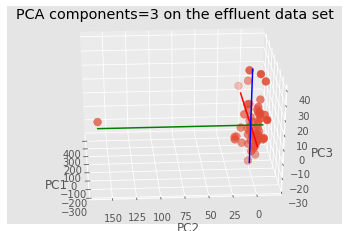

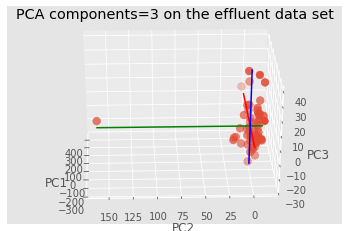

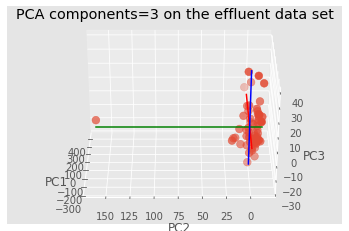

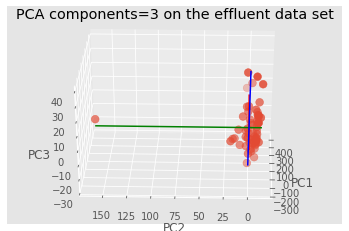

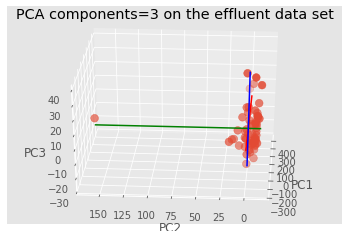

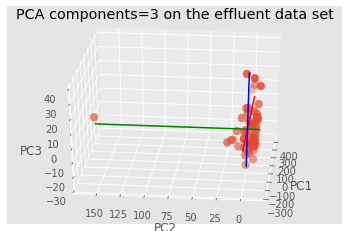

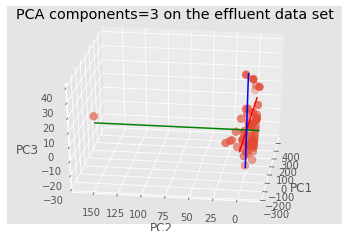

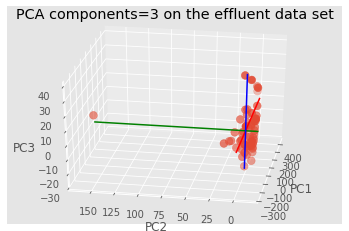

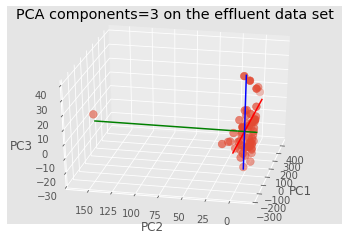

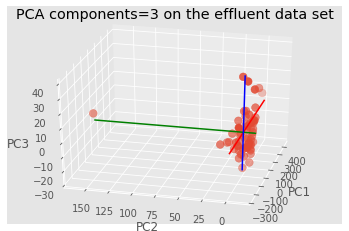

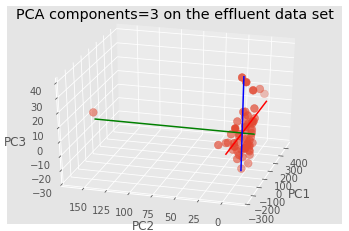

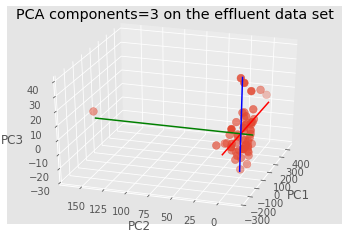

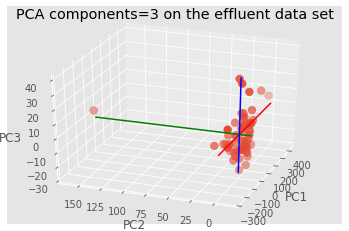

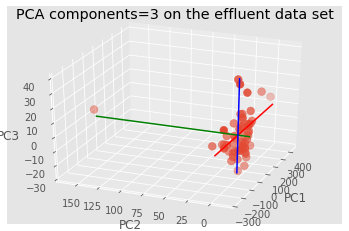

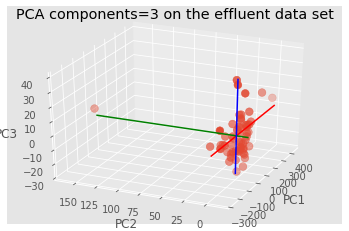

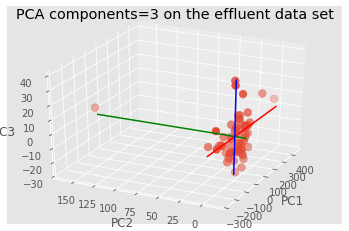

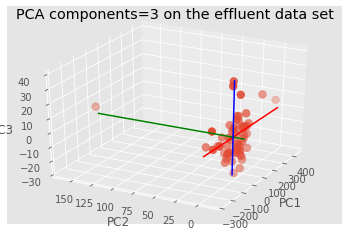

In [67]:
# 20 plots, for 20 different angles
for angle in range(70,210,2): 
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(effluent_trans_df['PCA0'], effluent_trans_df['PCA1'], effluent_trans_df['PCA2'], c=None, cmap="Set2_r", s=60)
 
    # make simple, bare axis lines through space:
    xAxisLine = ((min(effluent_trans_df['PCA0']), max(effluent_trans_df['PCA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(effluent_trans_df['PCA1']), max(effluent_trans_df['PCA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'g')
    zAxisLine = ((0, 0), (0,0), (min(effluent_trans_df['PCA2']), max(effluent_trans_df['PCA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')

    ax.view_init(30,angle)
    # label the axes
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("PCA components=3 on the effluent data set")
    filename= dir_data+'/PCA/'+'effluent_PCA_com3_angle'+str(angle)+'.png' 
    plt.savefig(filename, dpi=100)
    #plt.show()

def make_gif(input_folder, save_filepath):
    episode_frames = []
    time_per_step = 0.25
    for root, _, files in os.walk(input_folder):
        file_paths = [os.path.join(root, file) for file in files]
        #sorted by modified time
        file_paths = sorted(file_paths, key=lambda x: os.path.getmtime(x))
        episode_frames = [imageio.imread(file_path) 
                          for file_path in file_paths if file_path.endswith('.png')]
    episode_frames = np.array(episode_frames)
    imageio.mimsave(save_filepath, episode_frames, duration=time_per_step)
        
make_gif('/Volumes/Transcend/下載項目/實習/工研院/paper/PCA/', '/Volumes/Transcend/下載項目/實習/工研院/paper/PCA/effluent_PCA_com3.gif')


[[  89.5361     0.20329   -0.23508]
 [-665.12529   -1.51018    1.7463 ]]


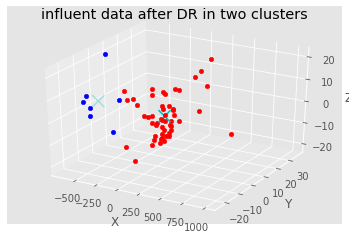

In [68]:
# https://gist.github.com/spyhi/ec8e60419d90aefc8537eb557ef35826
# Initialize the KMeans cluster module. Setting it to find two clusters.
clusters = KMeans(n_clusters=2, max_iter=300)

# Fit model to our selected features.
clusters.fit(influent_trans)

# Put centroids and results into variables.
centroids = clusters.cluster_centers_
labels = clusters.labels_

# Sanity check
print(centroids)

# Create new MatPlotLib figure
fig = plt.figure()
# Add 3rd dimension to figure
ax = fig.add_subplot(111, projection='3d')

colors = ["r", "b"]

# Plot all the features and assign color based on cluster identity label
for i in range(len(influent_trans)):
    ax.scatter(xs=influent_trans[i][0], ys=influent_trans[i][1], zs=influent_trans[i][2],
               c=colors[labels[i]], zdir='z')

# Plot centroids, though you can't really see them.
ax.scatter(xs=centroids[:,0], ys=centroids[:,1], zs=centroids[:,2],
           marker="x", s=150, c="c")

#Set labels on figure and show 3D scatter plot to visualize data and clusters.


ax.set_title("influent data after DR in two clusters")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


[[ 735.68009   -4.25362    3.37717]
 [  63.69034    0.38157   -0.37957]
 [-665.12529   -1.51018    1.7463 ]]


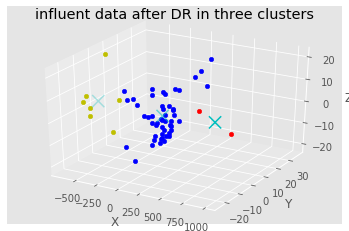

In [69]:
# https://gist.github.com/spyhi/ec8e60419d90aefc8537eb557ef35826
# Initialize the KMeans cluster module. Setting it to find three clusters.
clusters = KMeans(n_clusters=3, max_iter=300)

# Fit model to our selected features.
clusters.fit(influent_trans)

# Put centroids and results into variables.
centroids = clusters.cluster_centers_
labels = clusters.labels_

# Sanity check
print(centroids)

# Create new MatPlotLib figure
fig = plt.figure()
# Add 3rd dimension to figure
ax = fig.add_subplot(111, projection='3d')

colors = ["r", "b", "y"]

# Plot all the features and assign color based on cluster identity label
for i in range(len(influent_trans)):
    ax.scatter(xs=influent_trans[i][0], ys=influent_trans[i][1], zs=influent_trans[i][2],
               c=colors[labels[i]], zdir='z')

# Plot centroids, though you can't really see them.
ax.scatter(xs=centroids[:,0], ys=centroids[:,1], zs=centroids[:,2],
           marker="x", s=150, c="c")

#Set labels on figure and show 3D scatter plot to visualize data and clusters.
ax.set_title("influent data after DR in three clusters")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


[[ 103.40867   -0.24838   -0.62144]
 [-665.12529   -1.51018    1.7463 ]
 [ 993.6562    -9.18972    1.90978]
 [ -75.66034    3.35476    1.32963]]


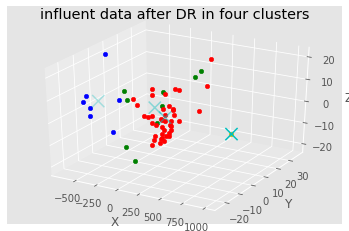

In [70]:
# https://gist.github.com/spyhi/ec8e60419d90aefc8537eb557ef35826
# Initialize the KMeans cluster module. Setting it to find four clusters.
clusters = KMeans(n_clusters=4, max_iter=300)

# Fit model to our selected features.
clusters.fit(influent_trans)

# Put centroids and results into variables.
centroids = clusters.cluster_centers_
labels = clusters.labels_

# Sanity check
print(centroids)

# Create new MatPlotLib figure
fig = plt.figure()
# Add 3rd dimension to figure
ax = fig.add_subplot(111, projection='3d')

colors = ["r", "b", "y", "g"]

# Plot all the features and assign color based on cluster identity label
for i in range(len(influent_trans)):
    ax.scatter(xs=influent_trans[i][0], ys=influent_trans[i][1], zs=influent_trans[i][2],
               c=colors[labels[i]], zdir='z')

# Plot centroids, though you can't really see them.
ax.scatter(xs=centroids[:,0], ys=centroids[:,1], zs=centroids[:,2],
           marker="x", s=150, c="c")

#Set labels on figure and show 3D scatter plot to visualize data and clusters.
ax.set_title("influent data after DR in four clusters")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


[[-12.13008   0.00219  -0.41804]
 [339.64228  -0.06135  11.70518]]


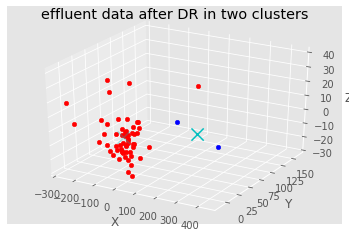

In [71]:
# https://gist.github.com/spyhi/ec8e60419d90aefc8537eb557ef35826
# Initialize the KMeans cluster module. Setting it to find two clusters.
clusters = KMeans(n_clusters=2, max_iter=300)

# Fit model to our selected features.
clusters.fit(effluent_trans)

# Put centroids and results into variables.
centroids = clusters.cluster_centers_
labels = clusters.labels_

# Sanity check
print(centroids)

# Create new MatPlotLib figure
fig = plt.figure()
# Add 3rd dimension to figure
ax = fig.add_subplot(111, projection='3d')
# This means "red" and "blue"
colors = ["r", "b"]

# Plot all the features and assign color based on cluster identity label
for i in range(len(effluent_trans)):
    ax.scatter(xs=effluent_trans[i][0], ys=effluent_trans[i][1], zs=effluent_trans[i][2],
               c=colors[labels[i]], zdir='z')

# Plot centroids, though you can't really see them.
ax.scatter(xs=centroids[:,0], ys=centroids[:,1], zs=centroids[:,2],
           marker="x", s=150, c="c")

#Set labels on figure and show 3D scatter plot to visualize data and clusters.
ax.set_title("effluent data after DR in two clusters")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


[[  13.48037    0.86293   -1.3968 ]
 [-116.9001    -3.51903    3.58595]
 [ 339.64228   -0.06135   11.70518]]


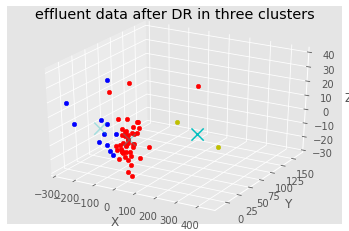

In [72]:
# https://gist.github.com/spyhi/ec8e60419d90aefc8537eb557ef35826
# Initialize the KMeans cluster module. Setting it to find three clusters.
clusters = KMeans(n_clusters=3, max_iter=300)

# Fit model to our selected features.
clusters.fit(effluent_trans)

# Put centroids and results into variables.
centroids = clusters.cluster_centers_
labels = clusters.labels_

# Sanity check
print(centroids)

# Create new MatPlotLib figure
fig = plt.figure()
# Add 3rd dimension to figure
ax = fig.add_subplot(111, projection='3d')
# This means "red" and "blue"
colors = ["r", "b", "y"]

# Plot all the features and assign color based on cluster identity label
for i in range(len(effluent_trans)):
    ax.scatter(xs=effluent_trans[i][0], ys=effluent_trans[i][1], zs=effluent_trans[i][2],
               c=colors[labels[i]], zdir='z')

# Plot centroids, though you can't really see them.
ax.scatter(xs=centroids[:,0], ys=centroids[:,1], zs=centroids[:,2],
           marker="x", s=150, c="c")

#Set labels on figure and show 3D scatter plot to visualize data and clusters.
ax.set_title("effluent data after DR in three clusters")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


[[ -55.51076    6.34896    1.20404]
 [ 339.64228   -0.06135   11.70518]
 [  25.19305   -2.98626   -1.95808]
 [-253.16844   -7.99415   11.1228 ]]


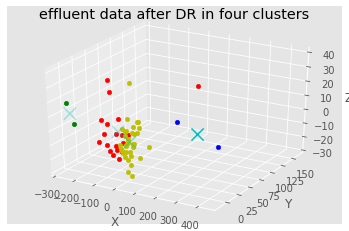

In [73]:
# https://gist.github.com/spyhi/ec8e60419d90aefc8537eb557ef35826
# Initialize the KMeans cluster module. Setting it to find four clusters.
clusters = KMeans(n_clusters=4, max_iter=300)

# Fit model to our selected features.
clusters.fit(effluent_trans)

# Put centroids and results into variables.
centroids = clusters.cluster_centers_
labels = clusters.labels_

# Sanity check
print(centroids)

# Create new MatPlotLib figure
fig = plt.figure()
# Add 3rd dimension to figure
ax = fig.add_subplot(111, projection='3d')
# This means "red" and "blue"
colors = ["r", "b", "y", "g"]

# Plot all the features and assign color based on cluster identity label
for i in range(len(effluent_trans)):
    ax.scatter(xs=effluent_trans[i][0], ys=effluent_trans[i][1], zs=effluent_trans[i][2],
               c=colors[labels[i]], zdir='z')

# Plot centroids, though you can't really see them.
ax.scatter(xs=centroids[:,0], ys=centroids[:,1], zs=centroids[:,2],
           marker="x", s=150, c="c")

#Set labels on figure and show 3D scatter plot to visualize data and clusters.
ax.set_title("effluent data after DR in four clusters")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()
